<a href="https://colab.research.google.com/github/hey-infy/US-Accidents-Analysis/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

TODO - Talk about EDA
TODO - talk about dataset (source, what does it contains ,how it is useful?)

- Dataset source - Kaggle
- Contains information about accidents 
- can be useful to prevent accidents

* This Dataset does not contain data of New York City.

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tanmaymishra01032000
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 128MB/s]


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation & Cleaning 

1. Load file using Pandas
2. Look at information about data & columns
3. Fix any missing or incorrect values

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']    #count the number of numeric columns in DF

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

% of missing value per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

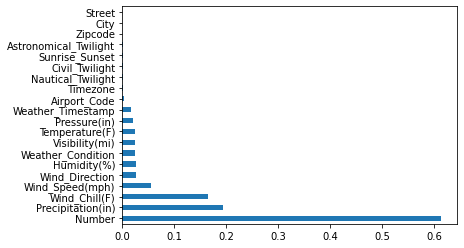

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

Remove the column not to be used 

## Exploratory analysis & visualization

Columns to Analyze:
1. City
2. Start Time 
3. Start Lat, Long
4. Temperature 
5. Weather Condition

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
cities = df.City.unique()
len(cities)

11682

In [ ]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:10]            #Finding the top 10 Cities by number of accidents 

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

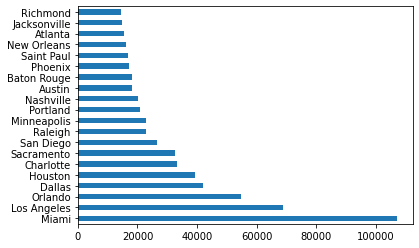

In [ ]:
cities_by_accidents[:20].plot(kind ='barh')

In [ ]:
#Frequency distribution of accidents by cities
import seaborn as sns
sns.set_style("darkgrid")

Text(0, 0.5, 'City Count')

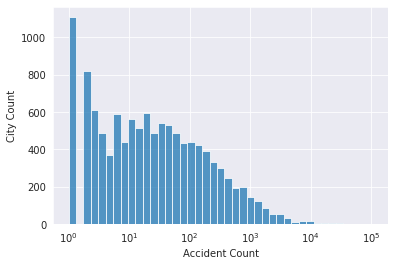

In [ ]:
sns.histplot(cities_by_accidents,log_scale=True)    #Plotting a distribution plot to show distribution of accidents in cities.
plt.xlabel("Accident Count")
plt.ylabel("City Count")

As seen the plot show a Logarithmic representation, has a high rise near to 10^0 ~= 1 , showing that most cities have accidents in very less value.

In [ ]:
high_accident_cities = cities_by_accidents[cities_by_accidents > 1500]
low_accident_cities = cities_by_accidents[cities_by_accidents <= 1500]

Percentage of High Accident Cities :  2.62  and percentage of Low Accident Cities : 97.37


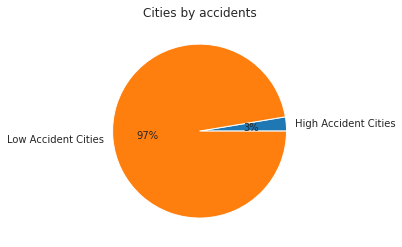

In [ ]:
a = (len(high_accident_cities) / len(cities)) * 100
b = (len(low_accident_cities) / len(cities)) * 100
print("Percentage of High Accident Cities : ",round(a,2)," and percentage of Low Accident Cities :", round(b, 2))
p = np.array([a,b])
label_of_chart = ["High Accident Cities", "Low Accident Cities"]
plt.title("Cities by accidents")
plt.pie(p, labels = label_of_chart, autopct='%1.0f%%')
plt.show()

Finding the presence of a city (New York) in the dataset as a city or as state entity.

In [ ]:
x = 'New York' in df.City
y = 'NY' in df.State
print(x,y)

False False


In [ ]:
one_accident_cities = cities_by_accidents[cities_by_accidents == 1]
print("Cities with one accident are : ",len(one_accident_cities))

Cities with one accident are :  1110


### Start Time Analysis

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)       #Converting the dType from String to Datetime series

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


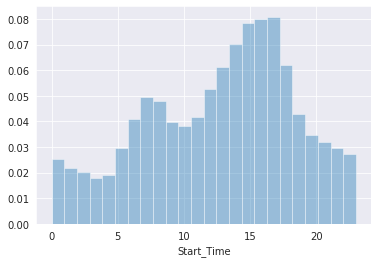

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True)      # Extracting the Hour from Time Series using -> df.Column_Name.dt.hour and 
                                                    # plotting a Distributionplot for it, Bin : equal width of bars in plot

Inference:
A High percentage of accidents occur in between 12:00 noon to 19:00 PM as noted to be the most commute time for people and the least recorded is before sunrise as roads tend to be comparitively less occupied. The sudden rise around 08:00 AM can be due to commute of students to schools and colleges. 

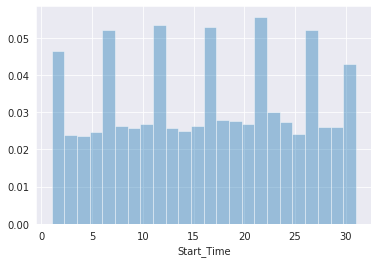

In [ ]:
sns.distplot(df.Start_Time.dt.day, bins= 24, kde=False, norm_hist= True)

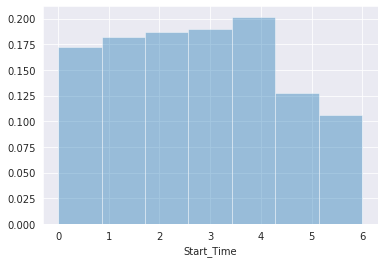

In [ ]:
sns.distplot(df.Start_Time.dt.day_of_week, bins = 7, kde = False, norm_hist = True)

0 = Monday and 6 = Sunday
According to the graph one can easily understand that from Monday to Friday the accidents are more as compared to weekend (Saturday & Sunday) where people tend to spend time off travelling.

--------------------------------------------------------------------------------

Is the distribution of accidents by hours the same on weekends as on weekdays  

[Text(0.5, 1.0, 'Monday')]

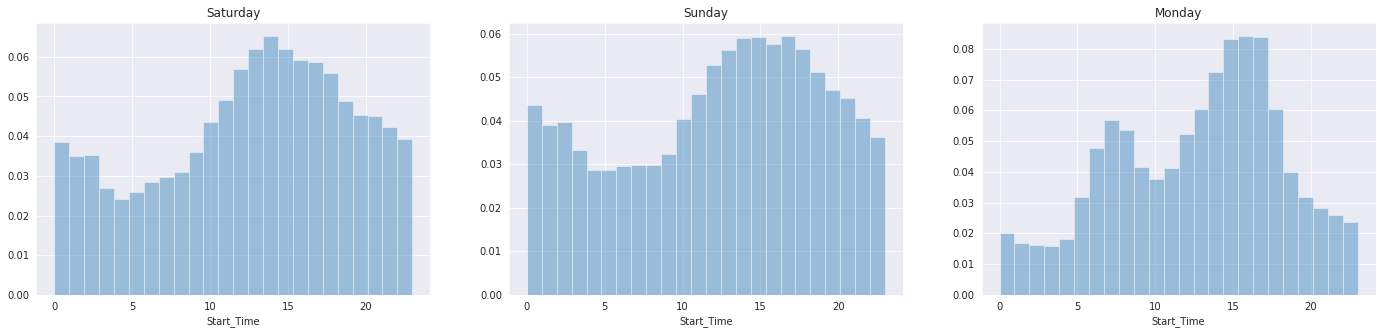

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.day_of_week == 5]
sundays_start_time = df.Start_Time[df.Start_Time.dt.day_of_week == 6]
mondays_start_time = df.Start_Time[df.Start_Time.dt.day_of_week == 0]

plt.figure(figsize=(24,5))
plt.subplot(1,3,1)
sns.distplot(saturdays_start_time.dt.hour , bins = 24, kde = False, norm_hist = True).set(title="Saturday")

plt.subplot(1,3,2)
sns.distplot(sundays_start_time.dt.hour , bins = 24, kde = False, norm_hist = True).set(title="Sunday")

plt.subplot(1,3,3)
sns.distplot(mondays_start_time.dt.hour , bins = 24, kde = False, norm_hist = True).set(title="Monday")


As observed from the graphs above, we can see somewhat identical curve trend in weekend, unlike the week day.
- The curve on weekend rising between 10:00 AM to 04:00 PM, might reveal the time for people to travel to and from place as of holidays schedule. 
- On Monday the graph represents 2 peaks at 08:00 AM and 16:00 PM, symbolising the usual commute time of masses to and from their respective organisations.

### Yearly Season-Wise Analysis of trend

[Text(0.5, 1.0, '2021')]

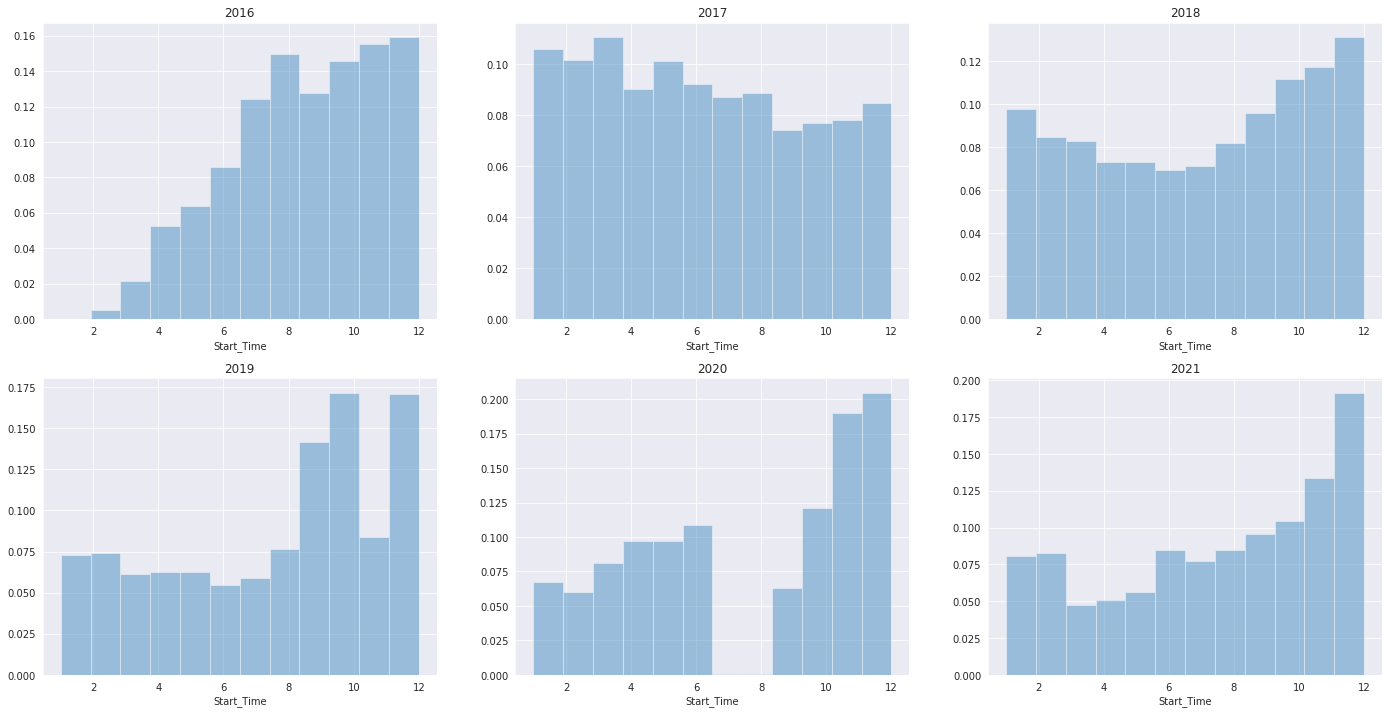

In [ ]:
df_2016 = df[df.Start_Time.dt.year == 2016]
df_2017 = df[df.Start_Time.dt.year == 2017]
df_2018 = df[df.Start_Time.dt.year == 2018]
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2020 = df[df.Start_Time.dt.year == 2020]
df_2021 = df[df.Start_Time.dt.year == 2021]

plt.figure(figsize = (24,12))

plt.subplot(2,3,1)
sns.distplot(df_2016.Start_Time.dt.month, bins= 12, kde=False, norm_hist = True).set(title = "2016")

plt.subplot(2,3,2)
sns.distplot(df_2017.Start_Time.dt.month, bins= 12, kde=False, norm_hist = True).set(title = "2017")

plt.subplot(2,3,3)
sns.distplot(df_2018.Start_Time.dt.month, bins= 12, kde=False, norm_hist = True).set(title = "2018")

plt.subplot(2,3,4)
sns.distplot(df_2019.Start_Time.dt.month, bins= 12, kde=False, norm_hist = True).set(title = "2019")

plt.subplot(2,3,5)
sns.distplot(df_2020.Start_Time.dt.month, bins= 12, kde=False, norm_hist = True).set(title = "2020")

plt.subplot(2,3,6)
sns.distplot(df_2021.Start_Time.dt.month, bins= 12, kde=False, norm_hist = True).set(title = "2021")

Similar trends are revealed in the year-wise graph that generally the winter season encounters a high average of accidents.
Possible reasons: 
1. Speed and braking distance on snowy or icy roads
2. Inadequate removal of snow
3. Inadequate tire grips
4. Sun reflecting on the snow
6. Extreme weather conditions


Here we can also answer another question - Are there more accidents in warm or cold areas?
we can see that colder areas can be more prone to accidents as winter seson shows higher average of accidents.

Faults/ Irregularities: 
- As this Dataset API was deployed in 2016, which might be possible reason for irregular trend in graph of 2016.
- The records for the year 2021 for the month of July- August is misssing too leaving a blank spot on the representation graph.

In [ ]:
sev_values = df.Severity.unique()
sev_values.sort()
sev_values

array([1, 2, 3, 4])

Text(0.5, 1.0, 'Severity of Accidents')

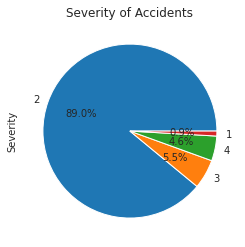

In [ ]:
#From Severity Column plot a pie chart that shows % of diffrent accidents.

a = df["Severity"].value_counts()
a.plot(kind= 'pie', figsize=(4,4) ,autopct='%1.1f%%')
plt.title("Severity of Accidents")

### Start Latitude & Longitude analysis

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))        #Creating a 10% sample of data for faster processing.

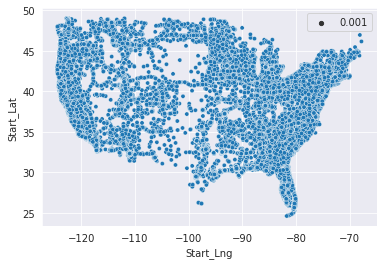

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size= 0.001)

A very brief inference from this plot is that major density of accidents are around peripheral regions.

In [ ]:
import folium       #Importing folium for map visualisation.

In [ ]:
from folium.plugins import HeatMap

In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng))  #As heat maps require a list of latitudes and longitude,
                                             #therefor we create a list of Lat & Long from df and zip it to make pair.

In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Summary & Conclusion

Insights:
- No Data for New York City.
- Most percentage is of low accidents in cities.
- Average accidents (distribution frequency of accidents) of cities is ~ 1000 to 3000 units.
- Over 1200 cities reported just 1 accident (Needs further investigation)
- Number of accidents per city decreases exponentially.

